## 4 Simulation experiments on the impact of $L$ and strategies
### 4.2 Strategies study

In [1]:
import os
path_y = os.getcwd() + '/results/y/'
path_true_x = os.getcwd() + '/results/true_x/'
path_res = os.getcwd() + '/results/res/'

os.chdir('../')
from inference_mahmm import *

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm 

palette = sns.color_palette("tab10", 10)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### Data recuperation

In [2]:
Σ, seeds, L = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1], np.arange(1000), [0, 2, 5, 8, 10]
fees = [0, 0.0005, 0.001, 0.002]

In [3]:
f, f_c = np.zeros((len(Σ), len(seeds), len(fees))), np.zeros((len(Σ), len(seeds), len(fees)))

for si, σ in enumerate(Σ):
    for seedi, seed in tqdm(enumerate(seeds)):
        true_x = np.asarray(np.load(path_true_x + 'true_x_' + str(seed) + '.npy', 'r'))[-300:]
        y = np.asarray(np.load(path_y + 'y_sigma' + str(σ) + '_' + str(seed) + '.npy', 'r'))[-300:]

        for li, l in enumerate(L):
            with open(path_res + 'res_up_L' + str(l) + '_sigma' + str(σ) + '_' + str(seed) + '.pickle', 'rb') as handle:
                res = pickle.load(handle)
            x_b, x_c = res['x_b'], res['x_c']
                
            f[si, seedi] = [get_fees_strat(x_b, fee, y/100, 'average') for fee in fees]
            f_c[si, seedi] = [get_fees_strat(x_c, fee, y/100, 'average') for fee in fees]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

##### Cumulated transaction fees

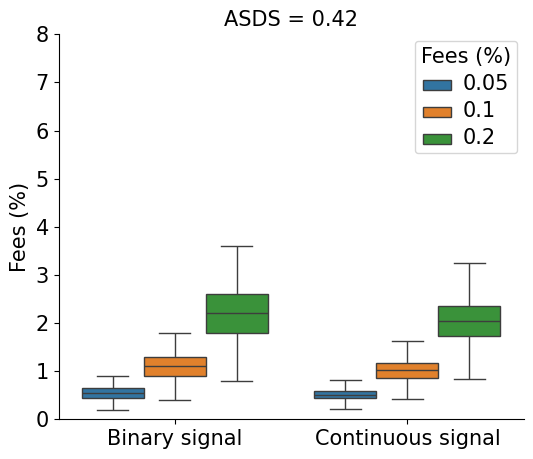

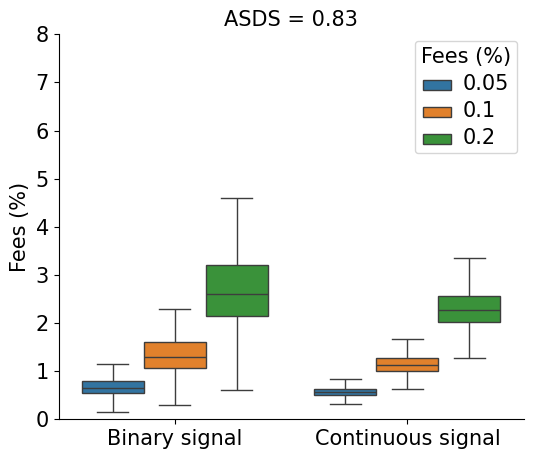

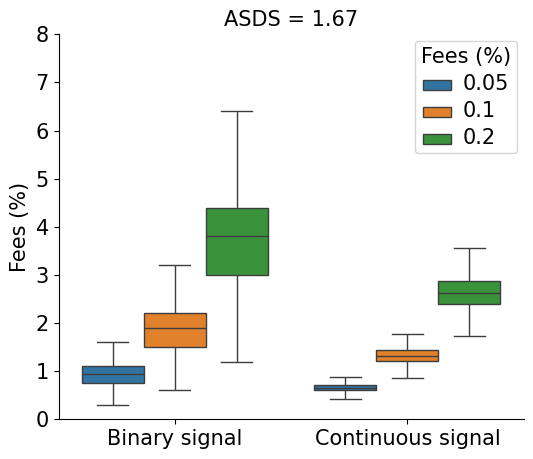

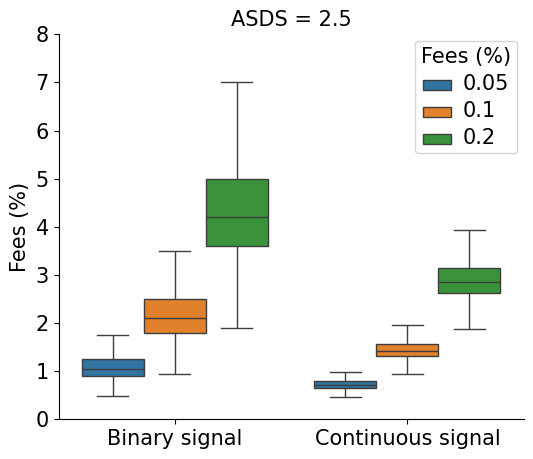

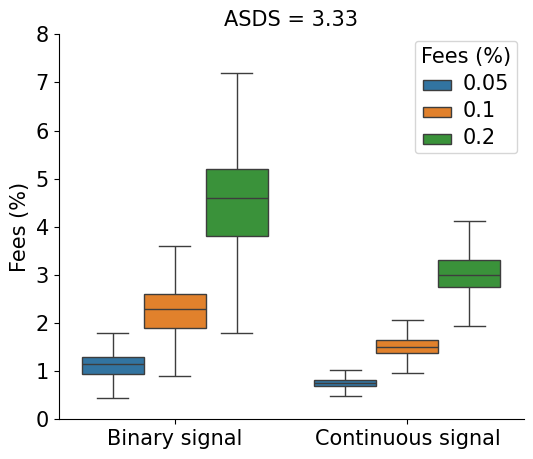

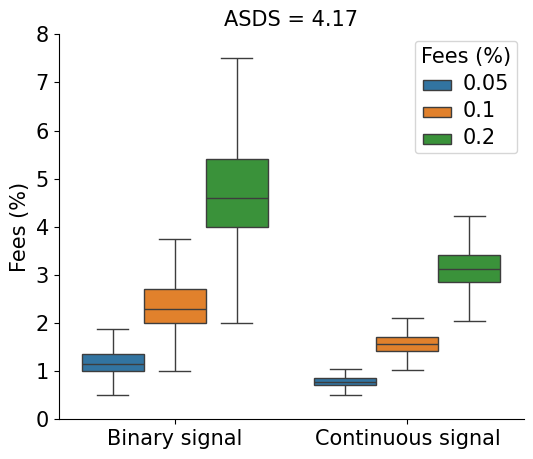

In [4]:
for si, σ in enumerate(Σ):
    fig = plt.figure(figsize=(6, 5))
    df_melted_b = pd.DataFrame([['Binary signal', σ, f[si, seedi, fi+1]*100, fee*100] for seedi, seed in enumerate(seeds) for fi, fee in enumerate(fees[1:])])
    df_melted_c = pd.DataFrame([['Continuous signal', σ, f_c[si, seedi, fi+1]*100, fee*100] for seedi, seed in enumerate(seeds) for fi, fee in enumerate(fees[1:])])
    df_melted = pd.concat([df_melted_b, df_melted_c], ignore_index=True)
    
    df_melted.columns = ['Type of signal', 'Sigma', 'Value', 'Fees (%)']
    df_melted['di'] = df_melted['Sigma']/0.02
    plt.ylim(0, 8)
    plt.title('ASDS = ' + str(np.round((σ/0.04+σ/0.02+σ/0.02)/3,2)), fontsize=15)

    grf = sns.boxplot(y='Value', x='Type of signal', hue='Fees (%)', data=df_melted, dodge=True, palette = palette, showfliers=False)
    grf.set(xlabel=None)
    plt.setp(grf.get_legend().get_texts(), fontsize='15')  
    plt.setp(grf.get_legend().get_title(), fontsize='15')  
    grf.tick_params(labelsize=15)
    plt.ylabel('Fees (%)', fontsize=15)

    sns.despine()
    plt.show()